In [12]:
import os
import gzip
import requests
import urllib.request
from bs4 import BeautifulSoup
from sunpy.map import Map
import astropy.units as u

In [6]:
mydatetime       = '2024-05-14T17:40'

data_dir = '/home/mnedal/data'

YEAR, MONTH, DAY = mydatetime.split('T')[0].split('-')
HOUR, MINUTE     = mydatetime.split('T')[1].split(':')
print(YEAR, MONTH, DAY, HOUR, MINUTE)

2024 05 14 17 40


In [3]:
def find_links(url='http://www.python.org'):
    """
    Get all the links in a webpage.
    Source: https://stackoverflow.com/questions/20150184/make-a-list-of-all-the-files-on-a-website
    """
    soup = BeautifulSoup(requests.get(url).text)
    hrefs = []
    for a in soup.find_all('a'):
        hrefs.append(a['href'])
    return hrefs

In [4]:
# show the links of the GONG fileS
gong_url = 'https://gong2.nso.edu/oQR/zqs/%s%s/mrzqs%s%s%s/' %(YEAR, MONTH, YEAR[-2:], MONTH, DAY)
list_gong_links = find_links(url=gong_url)

# show what you've found
for i, link in enumerate(list_gong_links):
    print(i, link)

0 ?C=N;O=D
1 ?C=M;O=A
2 ?C=S;O=A
3 ?C=D;O=A
4 /oQR/zqs/202405/
5 mrzqs240514t0004c2284_201.fits.gz
6 mrzqs240514t0104c2284_200.fits.gz
7 mrzqs240514t0114c2284_200.fits.gz
8 mrzqs240514t0244c2284_199.fits.gz
9 mrzqs240514t0454c2284_198.fits.gz
10 mrzqs240514t0604c2284_197.fits.gz
11 mrzqs240514t0704c2284_197.fits.gz
12 mrzqs240514t0814c2284_196.fits.gz
13 mrzqs240514t0914c2284_196.fits.gz
14 mrzqs240514t1004c2284_195.fits.gz
15 mrzqs240514t1114c2284_194.fits.gz
16 mrzqs240514t1204c2284_194.fits.gz
17 mrzqs240514t1304c2284_193.fits.gz
18 mrzqs240514t1414c2284_193.fits.gz
19 mrzqs240514t1514c2284_192.fits.gz
20 mrzqs240514t1614c2284_192.fits.gz
21 mrzqs240514t1714c2284_191.fits.gz
22 mrzqs240514t1814c2284_191.fits.gz
23 mrzqs240514t1904c2284_190.fits.gz
24 mrzqs240514t2004c2284_190.fits.gz
25 mrzqs240514t2104c2284_189.fits.gz
26 mrzqs240514t2204c2284_189.fits.gz
27 mrzqs240514t2354c2284_187.fits.gz


In [7]:
gong_file_index = 10
gong_filename = list_gong_links[gong_file_index]

print(data_dir + gong_filename)

/home/mnedal/datamrzqs240514t0604c2284_197.fits.gz


In [10]:
if not os.path.exists(data_dir + gong_filename[:-3]) and not os.path.exists(data_dir + gong_filename):
    urllib.request.urlretrieve(url=gong_url+gong_filename, filename=data_dir+gong_filename)

if not os.path.exists(data_dir + gong_filename[:-3]):
    with gzip.open(data_dir + gong_filename, 'rb') as f:
        with open(data_dir + gong_filename[:-3], 'wb') as g:
            g.write(f.read())

In [13]:
# make a sunpy map of the file
gong_map = Map(data_dir + gong_filename[:-3])

# fix a bug in the GONG map file
if 'cunit1' not in gong_map.meta:
    gong_map.meta['cunit1'] = u.deg

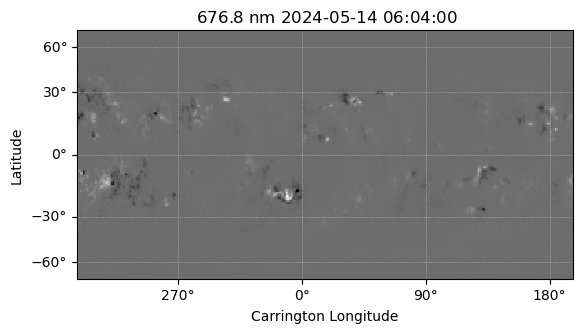

In [14]:
gong_map.plot()